# Модуль 1 · Семинар 2 · tasks_filters_edges_done

Этот ноутбук содержит ответы на вопросы самопроверки и решения упражнений ко второму семинару — **«Фильтры сглаживания и выделение границ»**.

**Зависимости:** `numpy`, `opencv-python` (`cv2`), `matplotlib`.

Цель: разобраться в работе сглаживающих фильтров, фильтра повышения резкости и операторов Собеля и Лапласа, а также увидеть на практике влияние параметров ядер на изображение.

## Q1. Чем отличаются усредняющий (box) фильтр, гауссов фильтр и медианный фильтр?

**Ответ:**

## Q2. Как размер ядра и параметр σ влияют на сглаживание?

**Ответ:**

## Q3. Что такое фильтр повышения резкости (unsharp mask)?

**Ответ:**

## Q4. Как работают операторы Собеля и Лапласа для выделения границ?

**Ответ:**


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Вспомогательная функция для отображения нескольких изображений
def show(images, titles=None, cols=3, figsize=(12,4), cmap=None):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i+1)
        if img.ndim == 2:  # grayscale
            plt.imshow(img, cmap=cmap or 'gray')
        else:
            # cv2 использует BGR, для matplotlib переведём в RGB
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        if titles and i < len(titles):
            plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout();
    plt.show()

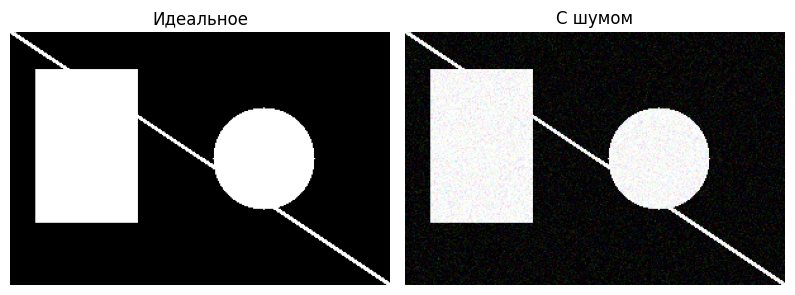

In [ ]:
# 1. Сгенерируем тестовое изображение с простыми фигурами и шумом
h, w = 200, 300
img = np.zeros((h, w, 3), dtype=np.uint8)
# белый прямоугольник
cv2.rectangle(img, (20, 30), (100, 150), (255,255,255), -1)
# белый круг
cv2.circle(img, (200, 100), 40, (255,255,255), -1)
# диагональная белая линия
cv2.line(img, (0,0), (w-1, h-1), (255,255,255), 2)

# добавим гауссов шум (среднее 0, σ=20)
noise = 
noisy_img = 

show([img, noisy_img], ['Идеальное', 'С шумом'])

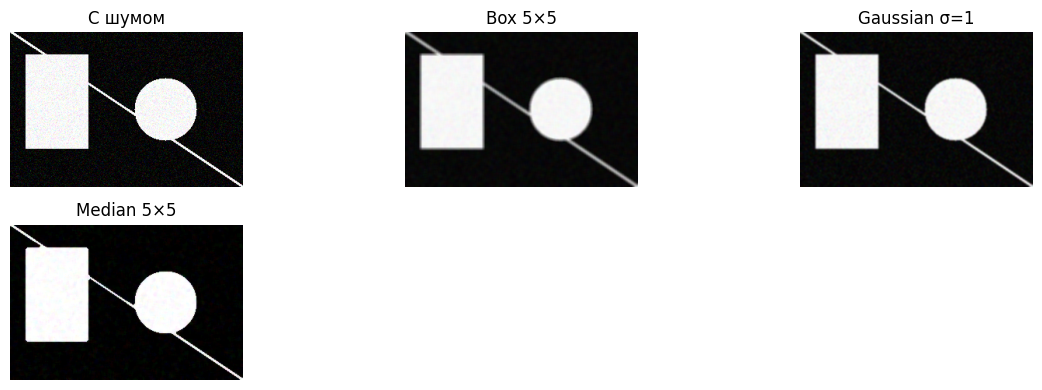

In [ ]:
# 2. Попробуем разные сглаживающие фильтры
# Box filter (усредняющий) с ядром 5x5
box = 
# Gaussian filter (σ=1.0)
gaussian = 
# Median filter (окрестность 5x5)
median = 

show([noisy_img, box, gaussian, median], ['С шумом', 'Box 5×5', 'Gaussian σ=1', 'Median 5×5'])

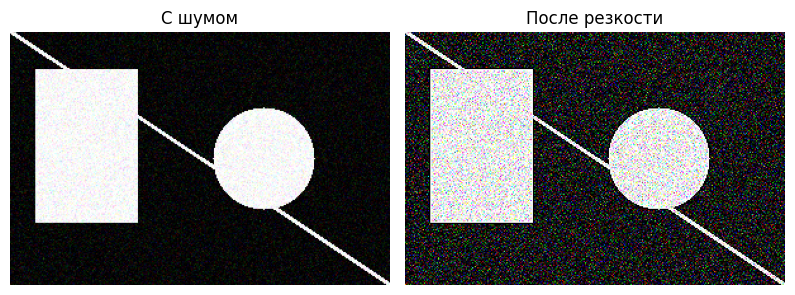

In [ ]:
# 3. Фильтр повышения резкости
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
sharpen = 

show([noisy_img, sharpen], ['С шумом', 'После резкости'])

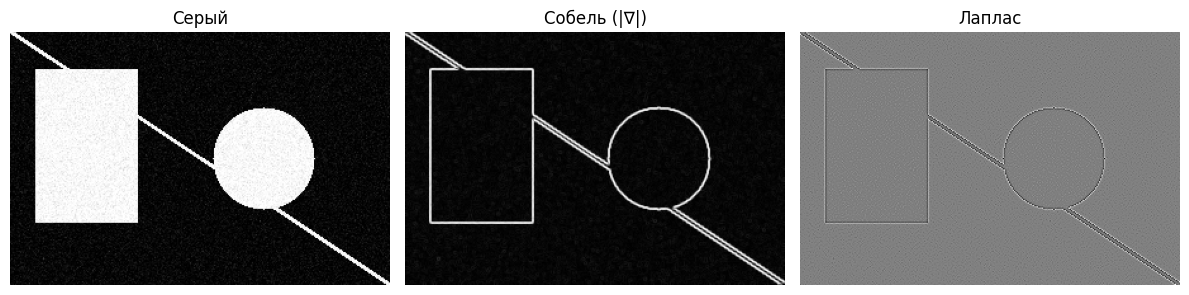

In [ ]:
# 4. Операторы Собеля и Лапласа
# Переведём изображение в оттенки серого
gray = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)


# Собель: производные по X и Y
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
# модуль градиента
sobel_grad = 
sobel_grad_norm = 


# Лапласиан
laplacian = 
laplacian_norm = 

show([gray, sobel_grad_norm, laplacian_norm], ['Серый', 'Собель (|∇|)', 'Лаплас'])

Попробуйте поэкспериментировать с размерами ядер (3×3, 7×7) и параметром σ в гауссовом фильтре, чтобы увидеть, как это влияет на баланс между шумоподавлением и сохранением деталей.

## Выводы

* **Box** и **Gaussian**  - ...
* **Median** - ....
* **Фильтр резкости** - ....
* **Оператор Собеля** -  ...
*  **Лапласиан** - ....

